# Data Wrangling

In [112]:
import polars as pl
import polars.selectors as cs
from plotnine import *
from great_tables import GT

## Household air pollution

- `hhap_deaths`: Causes of death linked to household pollution
- `fuel_types`: Types of fuel used for cooking in various countries, and
-  `clean_fuels`: Proportion of the population with acces to clean cooking fuels

In [113]:
hhap_deaths = pl.read_csv("https://bit.ly/data24-hhap-deaths")
fuel_types = pl.read_csv("https://bit.ly/data24-cooking-by-fuel-type")
clean_fuels = pl.read_csv("https://bit.ly/data24-clean-fuels-cooking")

In [114]:
(
clean_fuels.head(10)
)

region,country_code,country,year,pop_clean_fuels_cooking_mln,prop_clean_fuels_cooking_pct
str,str,str,i64,f64,f64
"""Africa""","""SSD""","""South Sudan""",2022,0.0,0.0
"""Western Pacific""","""NIU""","""Niue""",2022,0.002,98.5
"""Western Pacific""","""TKL""","""Tokelau""",2022,0.0004,28.3
"""Western Pacific""","""COK""","""Cook Islands""",2022,0.013,72.7
"""Western Pacific""","""PLW""","""Palau""",2022,0.007,29.45
"""Africa""","""STP""","""Sao Tome and Principe""",2022,0.009,4.1
"""Western Pacific""","""FSM""","""Micronesia (Federated States o…",2022,0.014,13.2
"""Africa""","""BDI""","""Burundi""",2022,0.013,0.1
"""Western Pacific""","""NRU""","""Nauru""",2022,0.011,100.0


In [115]:
(
    clean_fuels
    .describe()
)

statistic,region,country_code,country,year,pop_clean_fuels_cooking_mln,prop_clean_fuels_cooking_pct
str,str,str,str,f64,f64,f64
"""count""","""6402""","""6402""","""6402""",6402.0,6402.0,6402.0
"""null_count""","""0""","""0""","""0""",0.0,0.0,0.0
"""mean""",null,null,null,2006.0,19.29797,61.080069
"""std""",null,null,null,9.522648,73.100935,39.952764
"""min""","""Africa""","""AFG""","""Afghanistan""",1990.0,0.0,0.0
"""25%""",null,null,null,1998.0,0.23,16.6
"""50%""",null,null,null,2006.0,2.24,78.0
"""75%""",null,null,null,2014.0,10.24,100.0
"""max""","""Western Pacific""","""ZWE""","""Zimbabwe""",2022.0,1257.0,100.0


In [116]:
(
    clean_fuels
    .head(25)
    .describe()
)

(
    clean_fuels
    .describe()
    .tail(5)
)

statistic,region,country_code,country,year,pop_clean_fuels_cooking_mln,prop_clean_fuels_cooking_pct
str,str,str,str,f64,f64,f64
"""min""","""Africa""","""AFG""","""Afghanistan""",1990.0,0.0,0.0
"""25%""",null,null,null,1998.0,0.23,16.6
"""50%""",null,null,null,2006.0,2.24,78.0
"""75%""",null,null,null,2014.0,10.24,100.0
"""max""","""Western Pacific""","""ZWE""","""Zimbabwe""",2022.0,1257.0,100.0


In [117]:
(
    clean_fuels
    .glimpse()
)

Rows: 6402
Columns: 6
$ region                       <str> 'Africa', 'Western Pacific', 'Western Pacific', 'Western Pacific', 'Western Pacific', 'Africa', 'Western Pacific', 'Africa', 'Western Pacific', 'Western Pacific'
$ country_code                 <str> 'SSD', 'NIU', 'TKL', 'COK', 'PLW', 'STP', 'FSM', 'BDI', 'NRU', 'TUV'
$ country                      <str> 'South Sudan', 'Niue', 'Tokelau', 'Cook Islands', 'Palau', 'Sao Tome and Principe', 'Micronesia (Federated States of)', 'Burundi', 'Nauru', 'Tuvalu'
$ year                         <i64> 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022
$ pop_clean_fuels_cooking_mln  <f64> 0.0, 0.002, 0.0004, 0.013, 0.007, 0.009, 0.014, 0.013, 0.011, 0.009
$ prop_clean_fuels_cooking_pct <f64> 0.0, 98.5, 28.3, 72.7, 29.45, 4.1, 13.2, 0.1, 100.0, 75.2



# Select / Drop

In [118]:
(
    clean_fuels
    .select(pl.col("country"))
)

country
str
"""South Sudan"""
"""Niue"""
"""Tokelau"""
"""Cook Islands"""
"""Palau"""
…
"""Austria"""
"""Germany"""
"""Sweden"""


In [119]:
(
    clean_fuels
    .select("country_code", "country")
)

country_code,country
str,str
"""SSD""","""South Sudan"""
"""NIU""","""Niue"""
"""TKL""","""Tokelau"""
"""COK""","""Cook Islands"""
"""PLW""","""Palau"""
…,…
"""AUT""","""Austria"""
"""DEU""","""Germany"""
"""SWE""","""Sweden"""


In [120]:
(
    clean_fuels
    .select(
        pl.nth(0,3)
    )
)

region,year
str,i64
"""Africa""",2022
"""Western Pacific""",2022
"""Western Pacific""",2022
"""Western Pacific""",2022
"""Western Pacific""",2022
…,…
"""Europe""",1990
"""Europe""",1990
"""Europe""",1990


In [121]:
(
    clean_fuels
    .drop(
        pl.col("country"), pl.col("region")
    )
)

(
    clean_fuels
    .select(
        pl.all().exclude("country", "region")
    )
)

country_code,year,pop_clean_fuels_cooking_mln,prop_clean_fuels_cooking_pct
str,i64,f64,f64
"""SSD""",2022,0.0,0.0
"""NIU""",2022,0.002,98.5
"""TKL""",2022,0.0004,28.3
"""COK""",2022,0.013,72.7
"""PLW""",2022,0.007,29.45
…,…,…,…
"""AUT""",1990,7.72,100.0
"""DEU""",1990,79.12,100.0
"""SWE""",1990,8.57,100.0


In [122]:
(
    clean_fuels
    .select(
        pl.col("pop_clean_fuels_cooking_mln"),
        pl.col("prop_clean_fuels_cooking_pct"))
)

(
    clean_fuels
    .select(pl.nth(-1,-2))
)

(
    clean_fuels
    .drop("region", "country", "country_code", "year")
)

pop_clean_fuels_cooking_mln,prop_clean_fuels_cooking_pct
f64,f64
0.0,0.0
0.002,98.5
0.0004,28.3
0.013,72.7
0.007,29.45
…,…
7.72,100.0
79.12,100.0
8.57,100.0


# Selectors

In [123]:
(
    clean_fuels
    .select(cs.by_name("region", "country"))
)

(
    clean_fuels
    .select(cs.by_index(0,2,5))
)

region,country,prop_clean_fuels_cooking_pct
str,str,f64
"""Africa""","""South Sudan""",0.0
"""Western Pacific""","""Niue""",98.5
"""Western Pacific""","""Tokelau""",28.3
"""Western Pacific""","""Cook Islands""",72.7
"""Western Pacific""","""Palau""",29.45
…,…,…
"""Europe""","""Austria""",100.0
"""Europe""","""Germany""",100.0
"""Europe""","""Sweden""",100.0


In [124]:
(
    clean_fuels
    .select(cs.by_index(0))
)

region
str
"""Africa"""
"""Western Pacific"""
"""Western Pacific"""
"""Western Pacific"""
"""Western Pacific"""
…
"""Europe"""
"""Europe"""
"""Europe"""


In [125]:
(
    clean_fuels
    .select(~cs.first())
)

country_code,country,year,pop_clean_fuels_cooking_mln,prop_clean_fuels_cooking_pct
str,str,i64,f64,f64
"""SSD""","""South Sudan""",2022,0.0,0.0
"""NIU""","""Niue""",2022,0.002,98.5
"""TKL""","""Tokelau""",2022,0.0004,28.3
"""COK""","""Cook Islands""",2022,0.013,72.7
"""PLW""","""Palau""",2022,0.007,29.45
…,…,…,…,…
"""AUT""","""Austria""",1990,7.72,100.0
"""DEU""","""Germany""",1990,79.12,100.0
"""SWE""","""Sweden""",1990,8.57,100.0


In [126]:
(
    clean_fuels
    .select(~cs.numeric())
)

region,country_code,country
str,str,str
"""Africa""","""SSD""","""South Sudan"""
"""Western Pacific""","""NIU""","""Niue"""
"""Western Pacific""","""TKL""","""Tokelau"""
"""Western Pacific""","""COK""","""Cook Islands"""
"""Western Pacific""","""PLW""","""Palau"""
…,…,…
"""Europe""","""AUT""","""Austria"""
"""Europe""","""DEU""","""Germany"""
"""Europe""","""SWE""","""Sweden"""


# Filter

In [127]:
(
    clean_fuels
    .filter(pl.col("region")=="Europe")
)

region,country_code,country,year,pop_clean_fuels_cooking_mln,prop_clean_fuels_cooking_pct
str,str,str,i64,f64,f64
"""Europe""","""SMR""","""San Marino""",2022,0.034,100.0
"""Europe""","""MCO""","""Monaco""",2022,0.04,100.0
"""Europe""","""FRO""","""Faroe Islands""",2022,0.05,100.0
"""Europe""","""AND""","""Andorra""",2022,0.077,100.0
"""Europe""","""ISL""","""Iceland""",2022,0.35,100.0
…,…,…,…,…,…
"""Europe""","""BLR""","""Belarus""",1990,7.48,73.2
"""Europe""","""AUT""","""Austria""",1990,7.72,100.0
"""Europe""","""DEU""","""Germany""",1990,79.12,100.0


In [128]:
(
    clean_fuels
    .filter(pl.col("region")=="Europe", 
            pl.col("year")==2022, 
            pl.col("prop_clean_fuels_cooking_pct")<60)
)

region,country_code,country,year,pop_clean_fuels_cooking_mln,prop_clean_fuels_cooking_pct
str,str,str,i64,f64,f64
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2022,1.43,41.1


In [129]:
(
    clean_fuels
    .filter(pl.col("country_code")=="BIH")
)

region,country_code,country,year,pop_clean_fuels_cooking_mln,prop_clean_fuels_cooking_pct
str,str,str,i64,f64,f64
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2022,1.43,41.1
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2021,1.43,40.9
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2020,1.43,40.85
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2019,1.47,42.05
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2018,1.43,40.8
…,…,…,…,…,…
"""Europe""","""BIH""","""Bosnia and Herzegovina""",1994,2.29,58.0
"""Europe""","""BIH""","""Bosnia and Herzegovina""",1993,2.41,58.9
"""Europe""","""BIH""","""Bosnia and Herzegovina""",1992,2.47,58.25


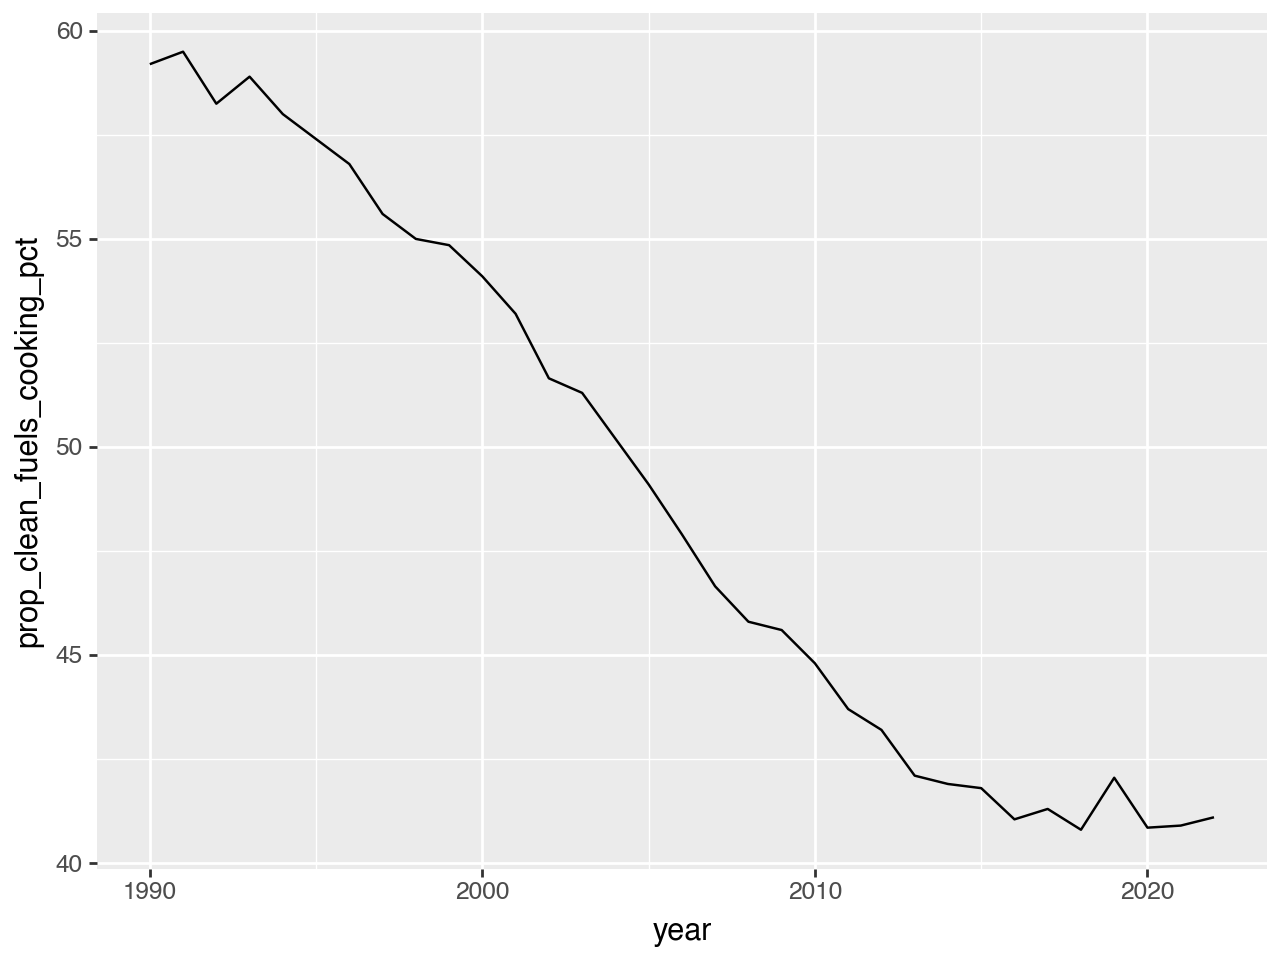

In [130]:
(
    ggplot(
        clean_fuels
    .filter(pl.col("country_code")=="BIH")
    ) +
    geom_line(aes(x="year", y="prop_clean_fuels_cooking_pct"))
)

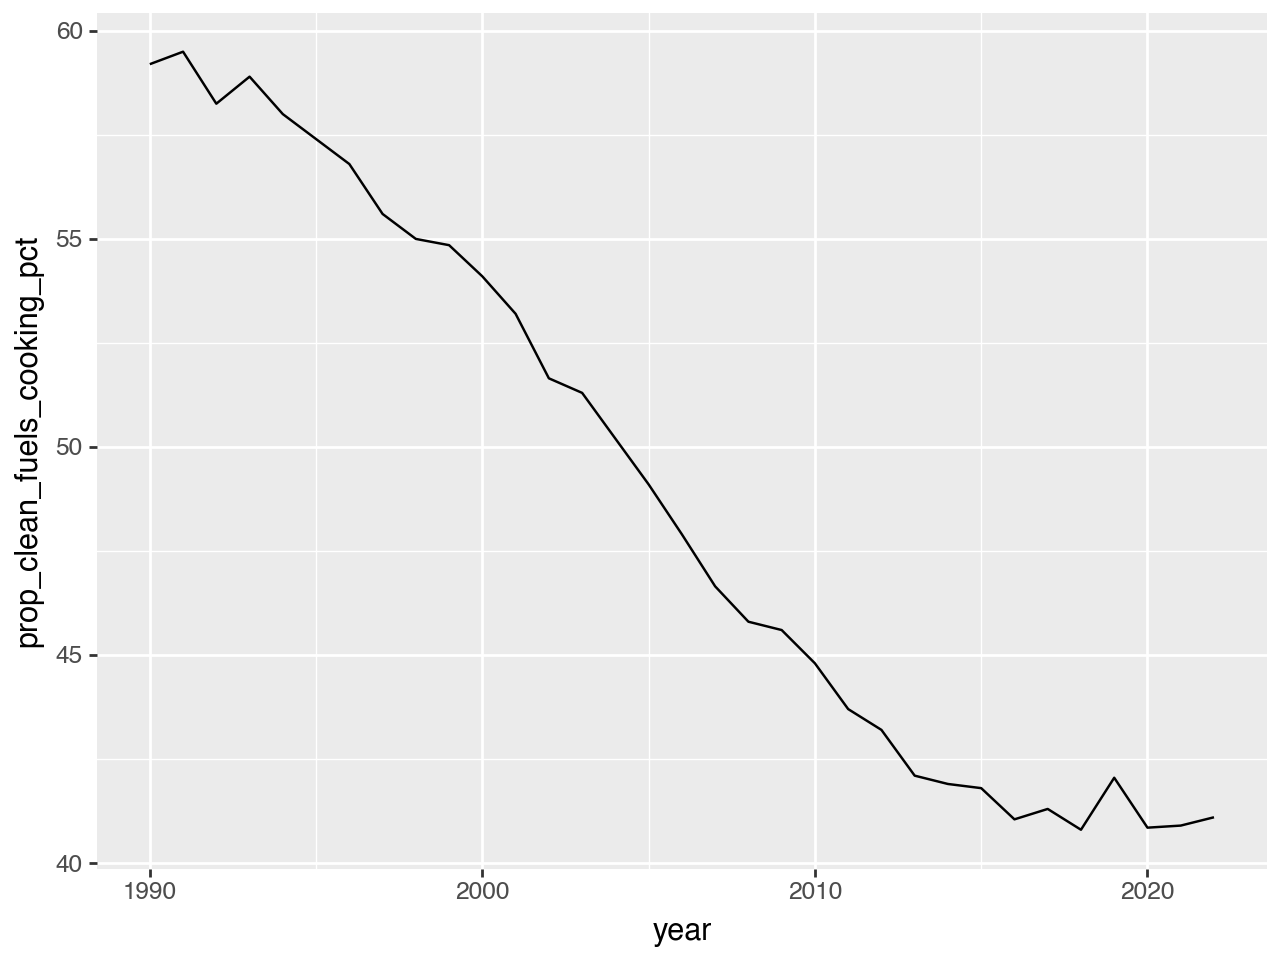

In [131]:
(
    clean_fuels
    .filter(pl.col("country_code")=="BIH")
    .pipe(ggplot) +
    geom_line(aes(x="year", y="prop_clean_fuels_cooking_pct"))
)

In [132]:
(
    clean_fuels
    .filter(pl.col("country").str.starts_with("Cz"))
)

region,country_code,country,year,pop_clean_fuels_cooking_mln,prop_clean_fuels_cooking_pct
str,str,str,i64,f64,f64
"""Europe""","""CZE""","""Czechia""",2022,10.63,100.0
"""Europe""","""CZE""","""Czechia""",2021,10.63,100.0
"""Europe""","""CZE""","""Czechia""",2020,10.63,100.0
"""Europe""","""CZE""","""Czechia""",2019,10.63,100.0
"""Europe""","""CZE""","""Czechia""",2018,10.63,100.0
…,…,…,…,…,…
"""Europe""","""CZE""","""Czechia""",1994,10.36,100.0
"""Europe""","""CZE""","""Czechia""",1993,10.36,100.0
"""Europe""","""CZE""","""Czechia""",1992,10.35,100.0


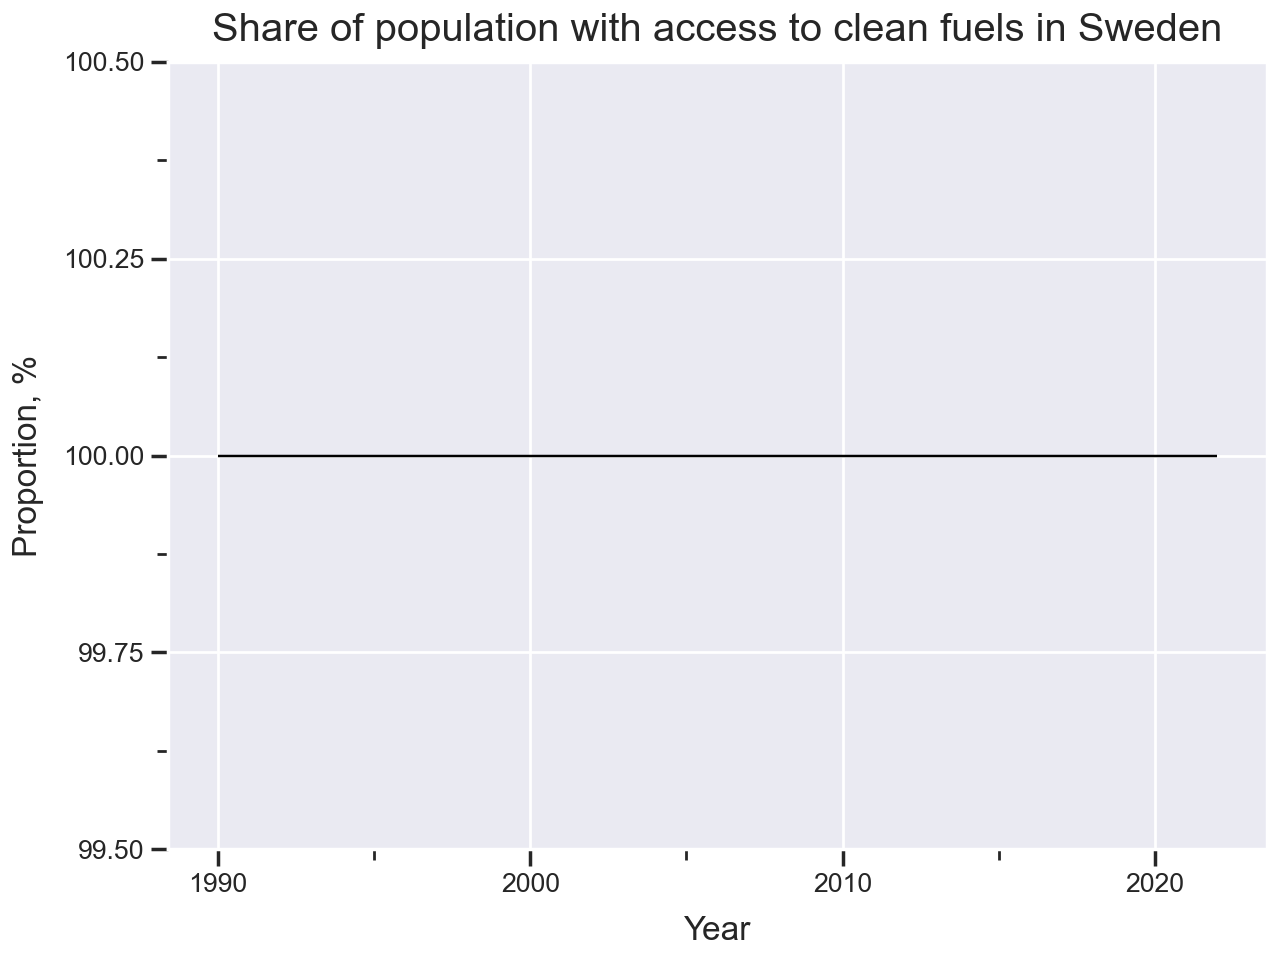

In [133]:
(
    clean_fuels
    .filter(pl.col("country").str.starts_with("Swe"))
    .pipe(ggplot) +
    geom_line(aes(x="year", y="prop_clean_fuels_cooking_pct")) +
    theme_seaborn() +
    labs(
        title="Share of population with access to clean fuels in Sweden",
        x="Year",
        y="Proportion, %"
    )
)

In [134]:
hhap_deaths

region,country_code,country,year,cause_of_death,deaths
str,str,str,i64,str,f64
"""Americas""","""ATG""","""Antigua and Barbuda""",2010,"""All causes""",0.0
"""Americas""","""ATG""","""Antigua and Barbuda""",2010,"""Acute lower respiratory infect…",0.0
"""Americas""","""ATG""","""Antigua and Barbuda""",2010,"""Trachea, bronchus, lung cancer…",0.0
"""Americas""","""ATG""","""Antigua and Barbuda""",2010,"""Ischaemic heart disease""",0.0
"""Americas""","""ATG""","""Antigua and Barbuda""",2010,"""Stroke""",0.0
…,…,…,…,…,…
"""Americas""","""BOL""","""Bolivia (Plurinational State o…",2019,"""Trachea, bronchus, lung cancer…",98.72
"""Africa""","""GNB""","""Guinea-Bissau""",2019,"""Chronic obstructive pulmonary …",98.88
"""Africa""","""CIV""","""Cote d'Ivoire""",2019,"""Chronic obstructive pulmonary …",990.6


In [135]:
(
    hhap_deaths
    .filter(pl.col("country_code")=="BIH",
            pl.col("year")==2010)
    
)

region,country_code,country,year,cause_of_death,deaths
str,str,str,i64,str,f64
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2010,"""Acute lower respiratory infect…",147.2
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2010,"""Stroke""",1685.0
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2010,"""Ischaemic heart disease""",2067.0
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2010,"""Chronic obstructive pulmonary …",365.2
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2010,"""All causes""",4816.0
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2010,"""Trachea, bronchus, lung cancer…",551.7


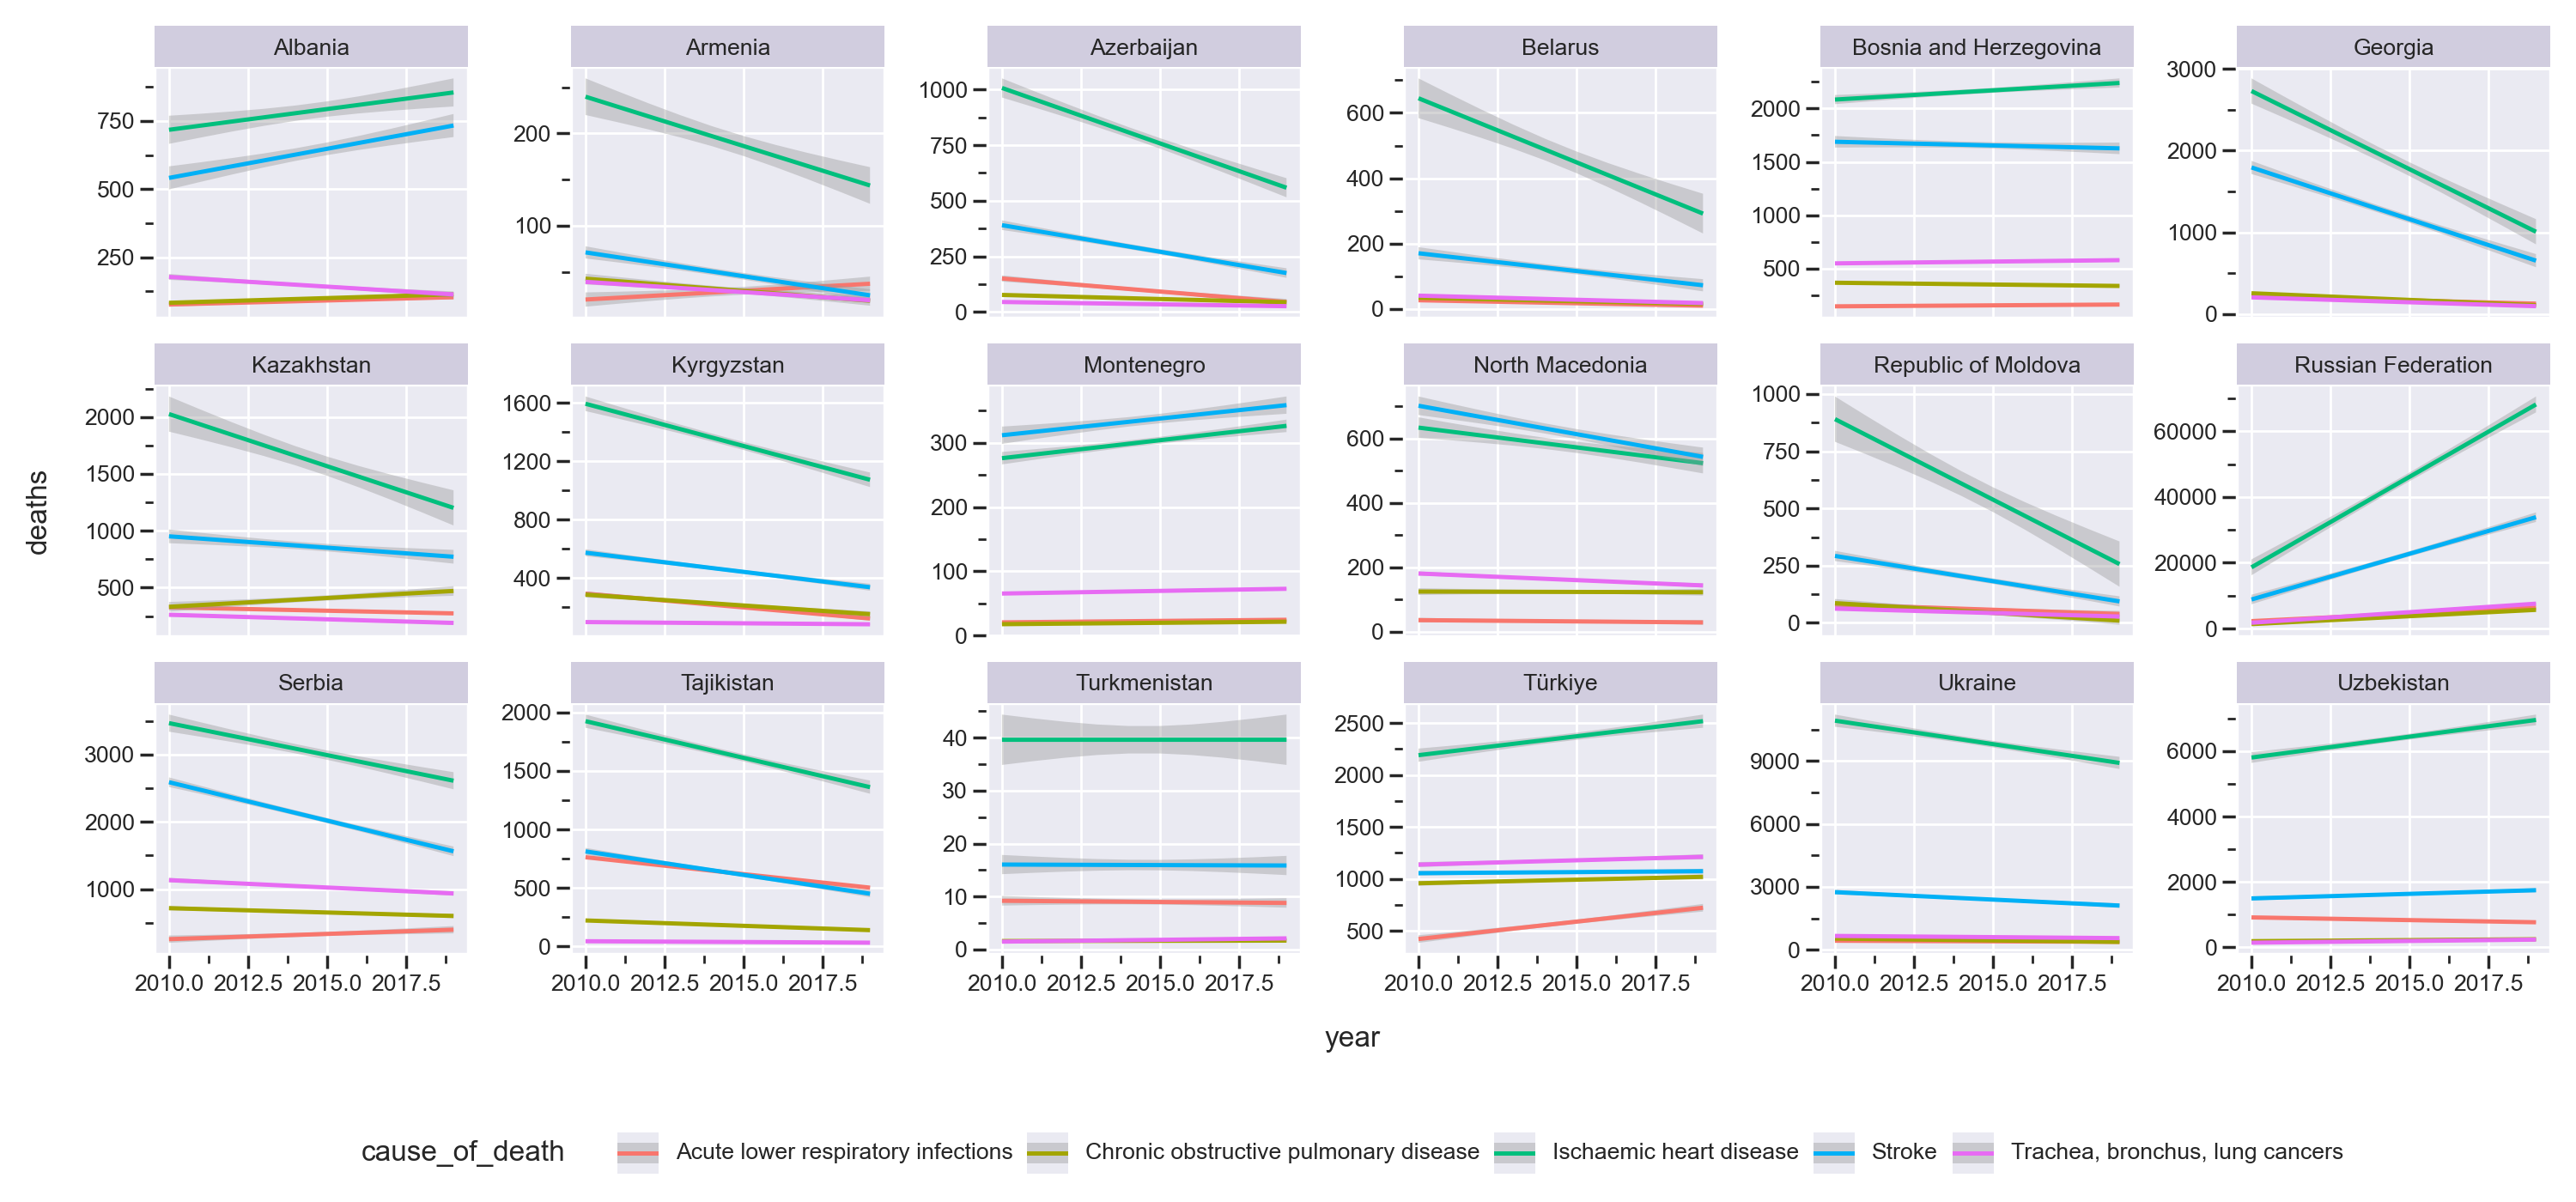

In [136]:
(
    hhap_deaths
    .filter(pl.col("region")=="Europe",
            pl.col("deaths")>0,
            pl.col("cause_of_death")!= "All causes")
    .pipe(ggplot) +
    geom_smooth(aes(x="year", y="deaths", color="cause_of_death"), 
                method="lm") +
    facet_wrap("country", scales="free_y", nrow=3) +
    theme_seaborn() +
    theme(figure_size=(15,7), legend_position="bottom")
)

# Creating new columns

In [137]:
(
    clean_fuels
    .with_columns(prop=pl.col("prop_clean_fuels_cooking_pct")/100)
)

region,country_code,country,year,pop_clean_fuels_cooking_mln,prop_clean_fuels_cooking_pct,prop
str,str,str,i64,f64,f64,f64
"""Africa""","""SSD""","""South Sudan""",2022,0.0,0.0,0.0
"""Western Pacific""","""NIU""","""Niue""",2022,0.002,98.5,0.985
"""Western Pacific""","""TKL""","""Tokelau""",2022,0.0004,28.3,0.283
"""Western Pacific""","""COK""","""Cook Islands""",2022,0.013,72.7,0.727
"""Western Pacific""","""PLW""","""Palau""",2022,0.007,29.45,0.2945
…,…,…,…,…,…,…
"""Europe""","""AUT""","""Austria""",1990,7.72,100.0,1.0
"""Europe""","""DEU""","""Germany""",1990,79.12,100.0,1.0
"""Europe""","""SWE""","""Sweden""",1990,8.57,100.0,1.0


In [138]:
clean_fuels_pop_df=(
    clean_fuels
    .with_columns(prop=pl.col("prop_clean_fuels_cooking_pct")/100)
    .with_columns(
        (pl.col("pop_clean_fuels_cooking_mln")/pl.col("prop")).alias("population")
    )
)

In [139]:
clean_fuels_pop_df.describe()

statistic,region,country_code,country,year,pop_clean_fuels_cooking_mln,prop_clean_fuels_cooking_pct,prop,population
str,str,str,str,f64,f64,f64,f64,f64
"""count""","""6402""","""6402""","""6402""",6402.0,6402.0,6402.0,6402.0,6402.0
"""null_count""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,null,2006.0,19.29797,61.080069,0.610801,NaN
"""std""",null,null,null,9.522648,73.100935,39.952764,0.399528,NaN
"""min""","""Africa""","""AFG""","""Afghanistan""",1990.0,0.0,0.0,0.0,0.001112
"""25%""",null,null,null,1998.0,0.23,16.6,0.166,1.305556
"""50%""",null,null,null,2006.0,2.24,78.0,0.78,6.833333
"""75%""",null,null,null,2014.0,10.24,100.0,1.0,22.727273
"""max""","""Western Pacific""","""ZWE""","""Zimbabwe""",2022.0,1257.0,100.0,1.0,1431.66287


In [140]:
(clean_fuels_pop_df
 .filter(pl.col("population").is_nan()))

region,country_code,country,year,pop_clean_fuels_cooking_mln,prop_clean_fuels_cooking_pct,prop,population
str,str,str,i64,f64,f64,f64,f64
"""Africa""","""SSD""","""South Sudan""",2022,0.0,0.0,0.0,NaN
"""Africa""","""SSD""","""South Sudan""",2021,0.0,0.0,0.0,NaN
"""Africa""","""SSD""","""South Sudan""",2020,0.0,0.0,0.0,NaN
"""Africa""","""SSD""","""South Sudan""",2019,0.0,0.0,0.0,NaN
"""Africa""","""SSD""","""South Sudan""",2018,0.0,0.0,0.0,NaN
…,…,…,…,…,…,…,…
"""Africa""","""BEN""","""Benin""",1991,0.0,0.0,0.0,NaN
"""Africa""","""SLE""","""Sierra Leone""",1991,0.0,0.0,0.0,NaN
"""Africa""","""TGO""","""Togo""",1990,0.0,0.0,0.0,NaN


In [141]:
fuel_types_pop_df = (fuel_types
    .with_columns(population=pl.col("pop_cooking_mln")/pl.col("prop_cooking_pct")*100)                
                    )

In [142]:
(
    fuel_types_pop_df
    .filter(pl.col("country").str.starts_with("Bosni"))
)

region,country_code,country,year,fuel_type,pop_cooking_mln,prop_cooking_pct,population
str,str,str,i64,str,f64,f64,f64
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2022,"""Kerosene""",0.0,0.0,NaN
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2022,"""Coal""",0.003,0.1,3.0
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2022,"""Charcoal""",0.007,0.2,3.5
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2022,"""Gas""",0.23,6.5,3.538462
"""Europe""","""BIH""","""Bosnia and Herzegovina""",2022,"""Electricity""",1.07,30.7,3.485342
…,…,…,…,…,…,…,…
"""Europe""","""BIH""","""Bosnia and Herzegovina""",1990,"""Kerosene""",0.0,0.0,NaN
"""Europe""","""BIH""","""Bosnia and Herzegovina""",1990,"""Coal""",0.13,2.9,4.482759
"""Europe""","""BIH""","""Bosnia and Herzegovina""",1990,"""Gas""",0.37,8.2,4.512195


# Summaries

In [143]:
(
    fuel_types_pop_df
    .group_by("region", "country", "year")
    .agg(pl.col("population").mean())
)

region,country,year,population
str,str,i64,f64
"""Africa""","""Guinea-Bissau""",1997,NaN
"""Europe""","""Bosnia and Herzegovina""",1990,NaN
"""Americas""","""Bahamas""",1992,NaN
"""Eastern Mediterranean""","""Syrian Arab Republic""",1993,NaN
"""Americas""","""Ecuador""",2020,NaN
…,…,…,…
"""Eastern Mediterranean""","""Jordan""",2017,NaN
"""Europe""","""Montenegro""",2012,NaN
"""South-East Asia""","""Bangladesh""",2017,NaN


In [144]:
(
    fuel_types_pop_df
    .group_by("region", "country", "year")
    .agg(pl.col("population").drop_nans().mean().alias("mean_pop"))
)

pop_years_df=(
    fuel_types
    .filter(pl.col("prop_cooking_pct")>0)
    .with_columns(population=pl.col("pop_cooking_mln")/pl.col("prop_cooking_pct"))
    .group_by("region", "country", "year")
    .agg(pl.col("population").mean())
)

/Users/melkerliljegren/Documents/Python Repositories/Data-Literacy-with-Python-MNXB08/.venv/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


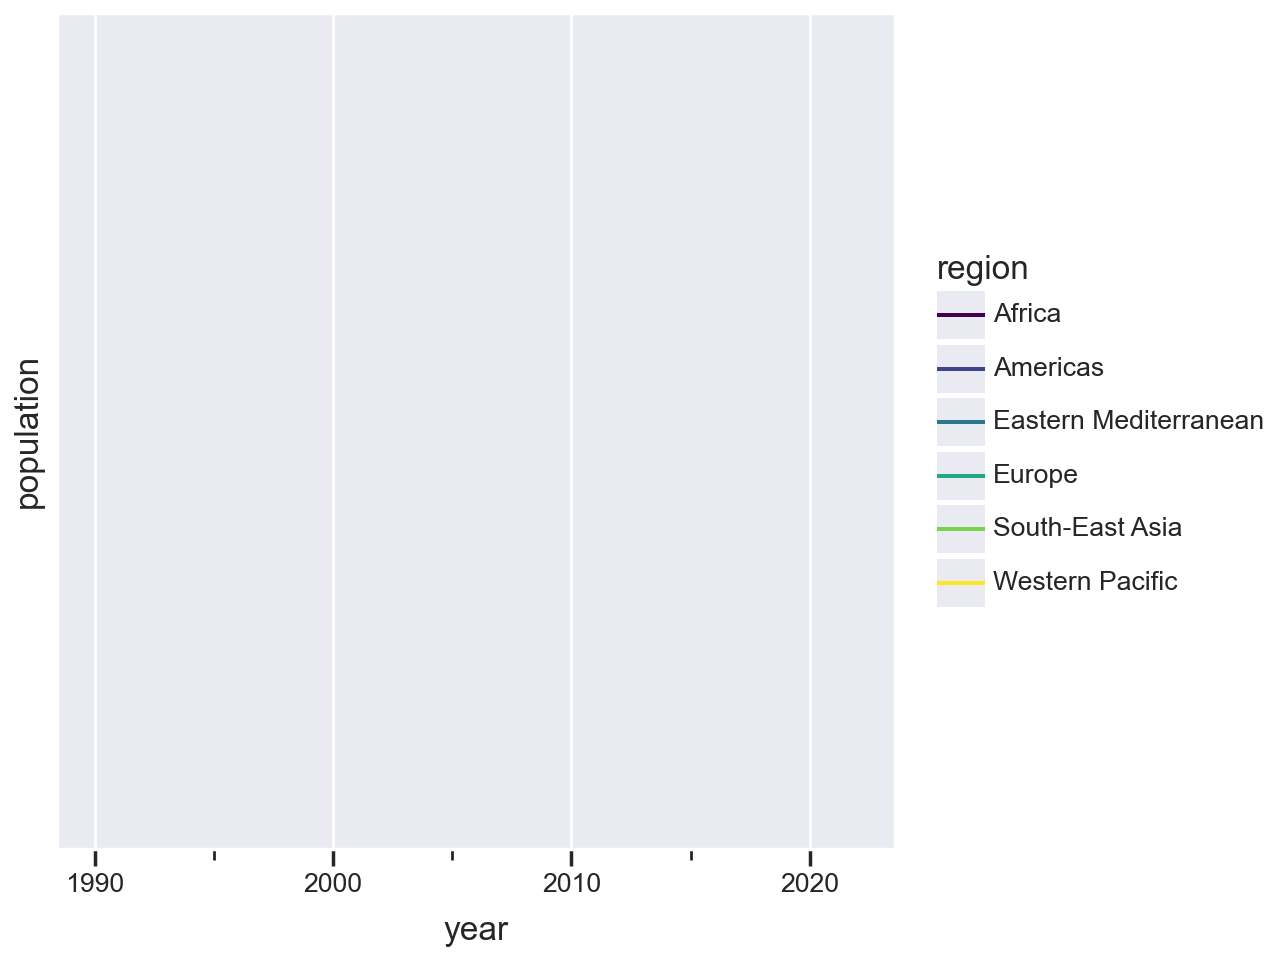

In [145]:
(fuel_types_pop_df
    .group_by("region", "country", "year")
    .agg(pl.col("population").drop_nans().mean())
    .group_by("region", "year")
    .agg(pl.col("population").sum())
    .pipe(ggplot)
    +geom_line(aes(x="year", y="population", color="region"))
    +scale_color_cmap_d()
    +theme_seaborn()
 )

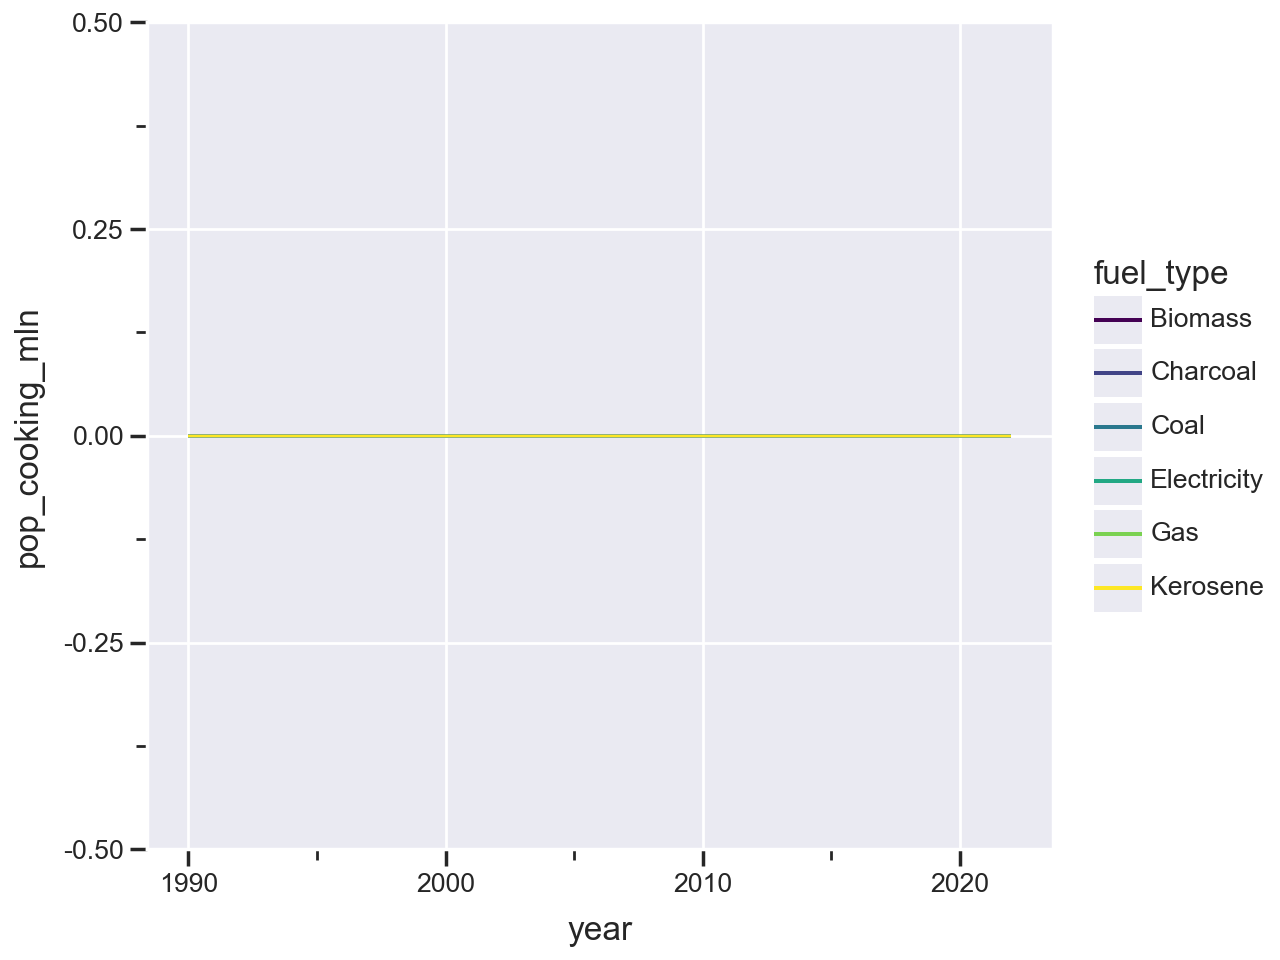

In [146]:
(fuel_types_pop_df
    .group_by("fuel_type", "year")
    .agg(pl.col("pop_cooking_mln").drop_nans().sum())
    .pipe(ggplot)
    +geom_line(aes(x="year", y="pop_cooking_mln", color="fuel_type", group="fuel_type"))
    +scale_color_cmap_d()
    +theme_seaborn()
 )

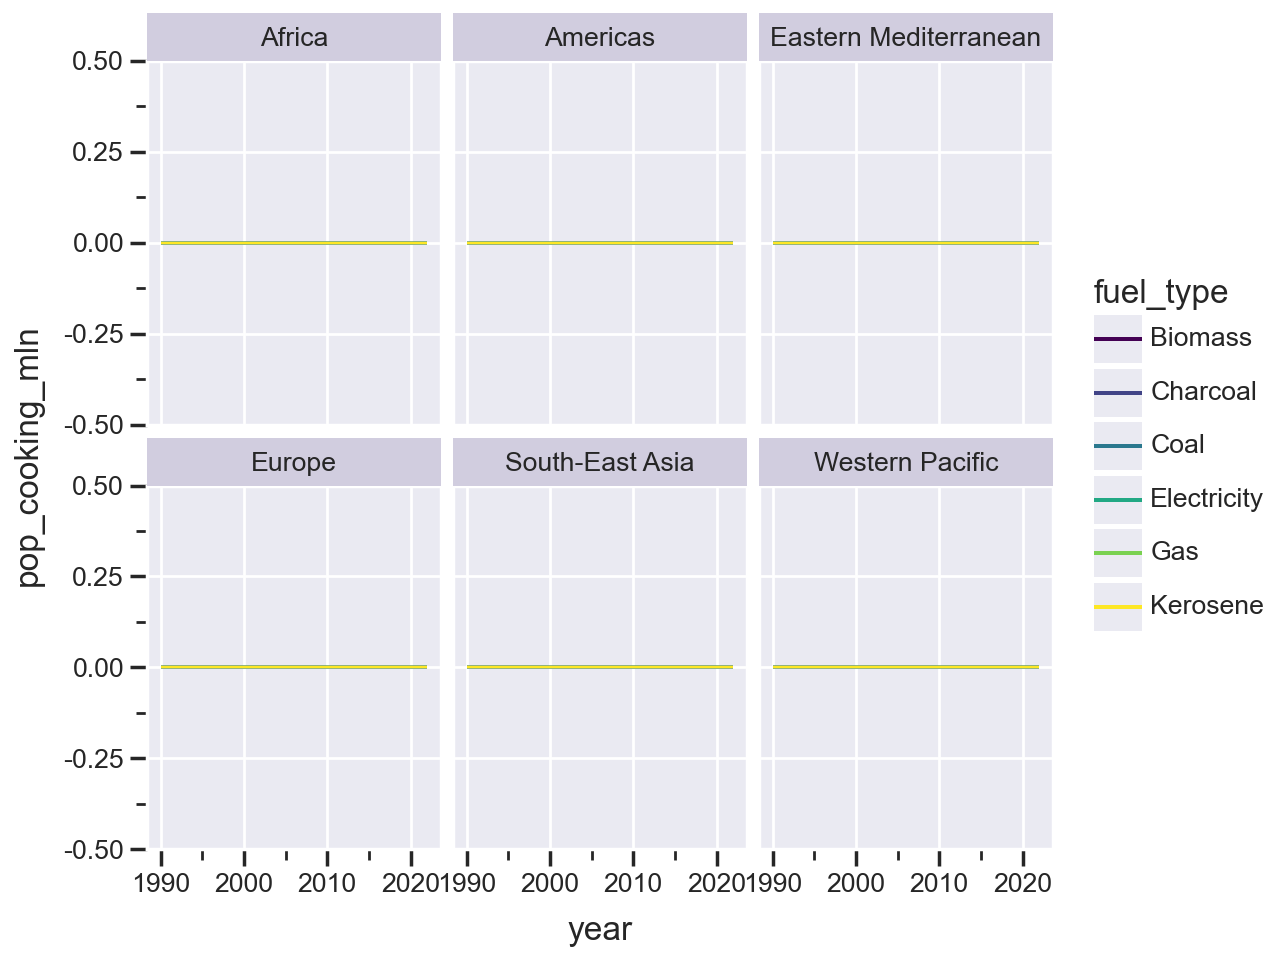

In [147]:
(fuel_types
    .group_by("fuel_type", "year", "region")
    .agg(pl.col("pop_cooking_mln").drop_nans().sum())
    .pipe(ggplot)
    +geom_line(aes(x="year", y="pop_cooking_mln", color="fuel_type", group="fuel_type"))
    +scale_color_cmap_d()
    +theme_seaborn()
    +facet_wrap("region", ncol=3)
 )

In [148]:
(fuel_types
    .group_by("fuel_type", "year", "region")
    .agg(pl.col("pop_cooking_mln").drop_nans().sum())
    .with_columns(prop_pop=(
            pl.col("pop_cooking_mln")/pl.col("pop_cooking_mln").sum()
    ).over("year", "region")
                )
 )

fuel_type,year,region,pop_cooking_mln,prop_pop
str,i64,str,f64,f64
"""Gas""",2012,"""South-East Asia""",0.0,NaN
"""Charcoal""",2008,"""Europe""",0.0,NaN
"""Coal""",2005,"""Europe""",0.0,NaN
"""Kerosene""",2012,"""Europe""",0.0,NaN
"""Coal""",1992,"""Europe""",0.0,NaN
…,…,…,…,…
"""Kerosene""",1990,"""Europe""",0.0,NaN
"""Gas""",2022,"""Western Pacific""",0.0,NaN
"""Gas""",2021,"""Western Pacific""",0.0,NaN


/Users/melkerliljegren/Documents/Python Repositories/Data-Literacy-with-Python-MNXB08/.venv/lib/python3.12/site-packages/plotnine/layer.py:358: PlotnineWarning: position_stack : Removed 1188 rows containing missing values.


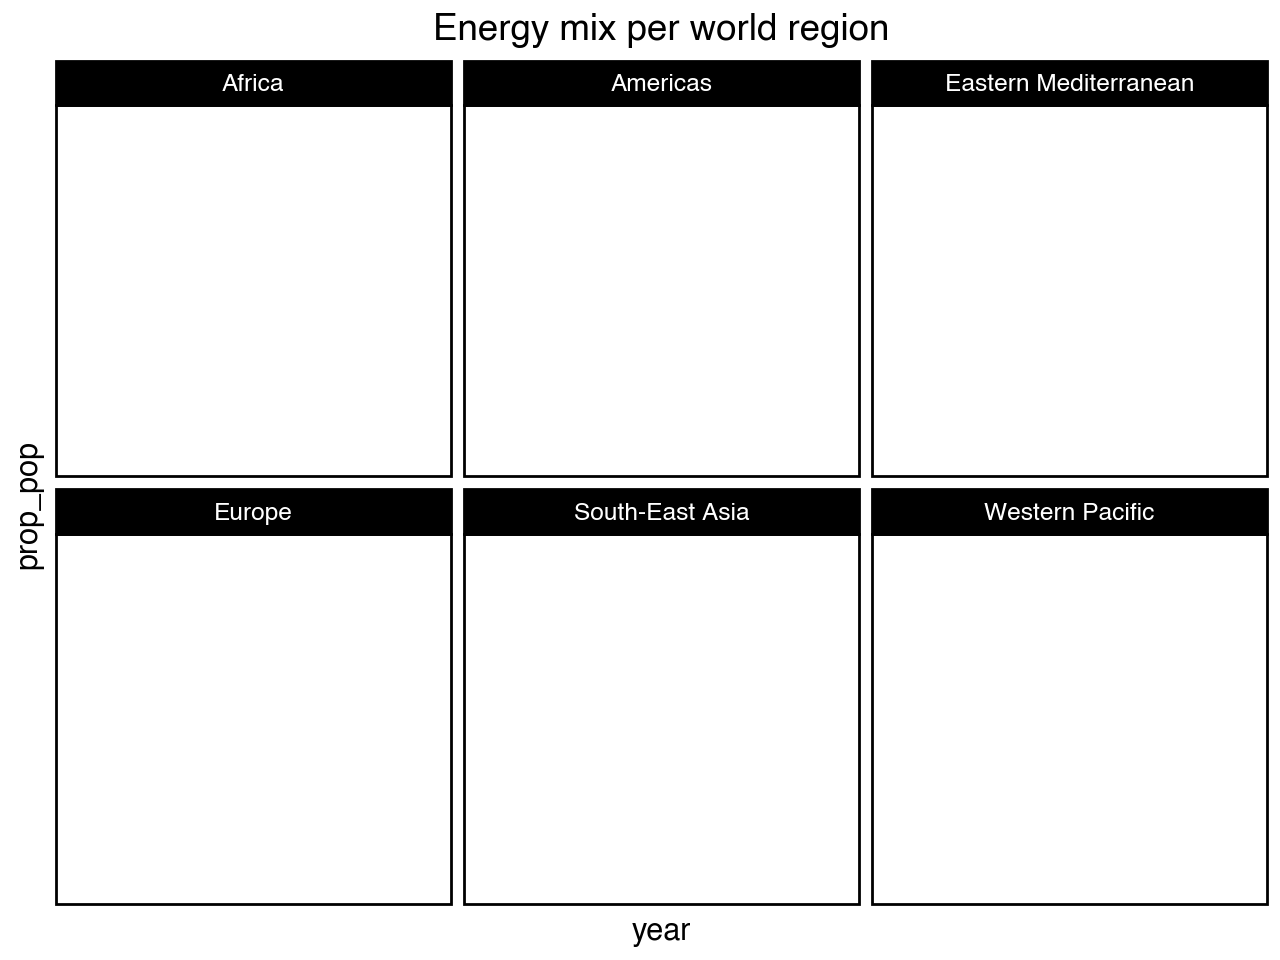

In [149]:
(fuel_types
    .group_by("fuel_type", "year", "region")
    .agg(pl.col("pop_cooking_mln").drop_nans().sum())
    .with_columns(prop_pop=(
            pl.col("pop_cooking_mln")/pl.col("pop_cooking_mln").sum()
    ).over("year", "region")
                )
    .pipe(ggplot)
    +geom_area(aes(x="year", y="prop_pop", fill="fuel_type"))
    +facet_wrap("region", ncol=3)
    +scale_fill_cmap_d()
    +theme_linedraw()
    +labs(title="Energy mix per world region")
 )

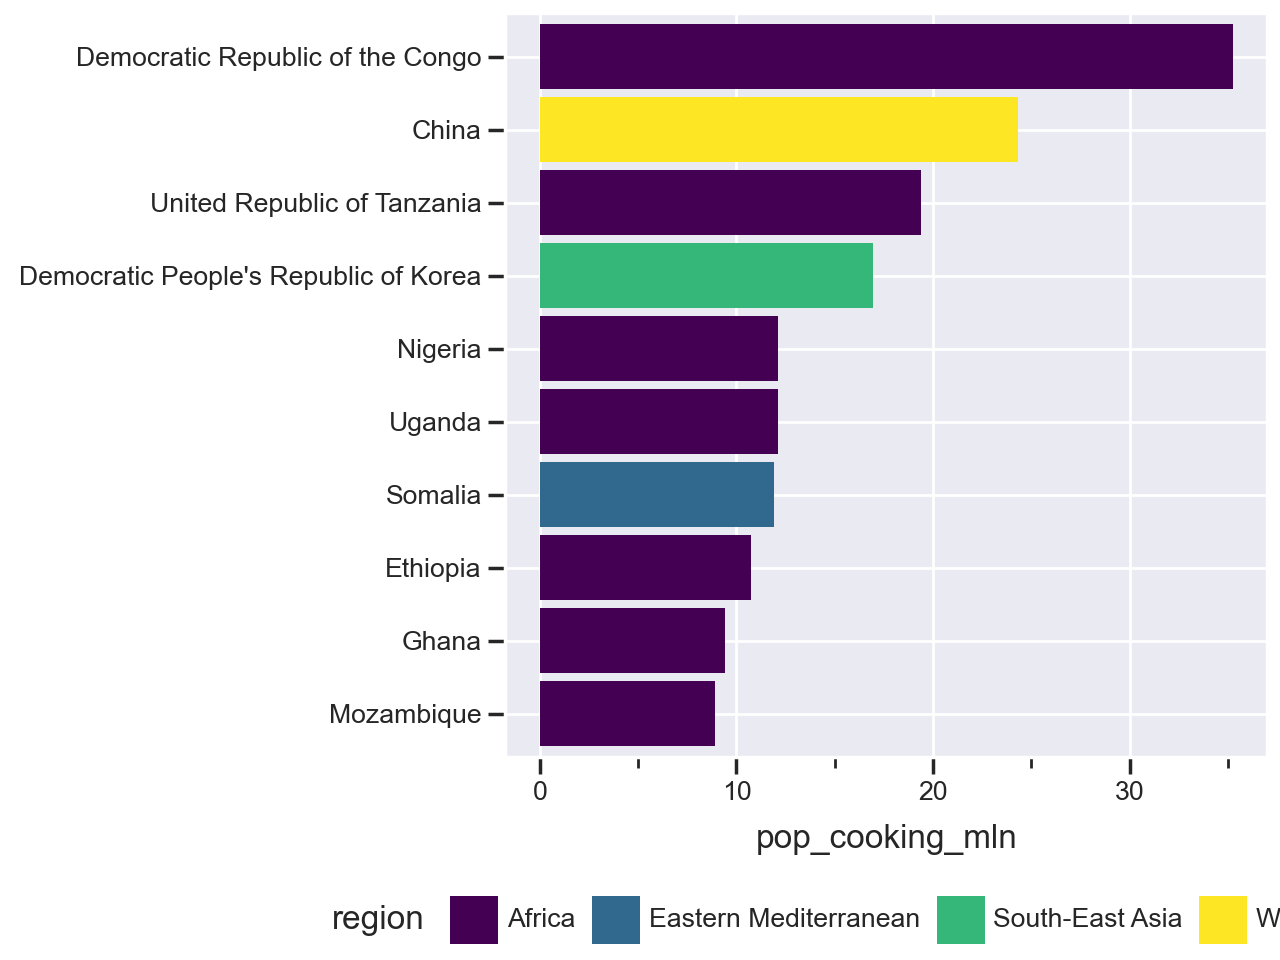

In [150]:
(fuel_types
    .filter(pl.col("fuel_type").str.ends_with("oal"),
            pl.col("year")==2022,
            pl.col("pop_cooking_mln")>0)
    .group_by("region", "country")
    .agg(pl.col("pop_cooking_mln").sum())
    .sort("pop_cooking_mln", descending=True)
    .head(10)
    .pipe(ggplot)
    +geom_col(aes(x="reorder(country, pop_cooking_mln)", y="pop_cooking_mln", fill="region"))
    +scale_fill_cmap_d()
    +coord_flip()
    +theme_seaborn()
    +theme(legend_position="bottom",
           axis_title_y=element_blank())
)